# Testing MPChem and Nahoon/Nautilus code (Wakelam+ 2011) with the kida.uva.2014 network

The goal of this notebook is to compare the abundances modelled with MPChem and nahoon/nautilus for the same physical conditions. This is done in case of <b>time-indipendent</b> physical conditions.

Note that in the kida network the unattenuated photo-rates are normalised for 1 Draine radiation field sthrength.
Furthermore, we set the O + OCN rate coefficient to $6.45 \times 10^{-11}$ cm$^{-3}$ s$^{-1}$, without temperature dependence. This is because the rate coefficients in kida are only valied above 300 K for this reaction. Their chemical code uses the lowest temperature rate in the validity range when the temperature is below the range.

In [1]:
import sys
import pychemic as pych
import numpy as np
%matplotlib inline

In [3]:
#
# Read the KIDA/Nahoon models
#

w15        = pych.model.read_nahoon('nautilus-models/nahoon_2e4cm-3_10K_30mag.dat', 
                              ns=490, verbose=False)
pdr1av     = pych.model.read_nahoon('nautilus-models/nahoon_2e4cm-3_20K_1mag.dat', 
                              ns=490, verbose=False, 
                              kappa_file='nautilus-models/Kout_2e4cm-3_20K_1mag.dat',
                              network_file='nautilus-models/kida.uva.2014')
pdr1avn200 = pych.model.read_nahoon('nautilus-models/nahoon_2e2cm-3_20K_1mag.dat',
                              ns=490, verbose=False)
s15nh      = pych.model.read_nahoon('nautilus-models/nahoon_1e5cm-3_10K_30mag.dat', 
                              ns=490, verbose=False,
                              kappa_file='nautilus-models/Kout_1e5cm-3_10K_30mag.dat',
                              network_file='nautilus-models/kida.uva.2014')

#
# Read MPChem results
#

tmc1        = pych.model.read_alchemic("results/kida2014_00000001.idl", verbose=False)
pdrk1av     = pych.model.read_alchemic("results/kida2014_00000005.idl", verbose=False)
pdrk1avn200 = pych.model.read_alchemic("results/kida2014_00000007.idl", verbose=False)
s15mpc      = pych.model.read_alchemic("results/kida2014_00000010.idl", verbose=False)
# Ignore the warning about the invalid value at division. This functionality is not used here.
# Read the ALCHEMIC models

---Reading with alternative method, using 11 characters per element!
---Reading with alternative method, using 11 characters per element!


## High density and high A<sub>V</sub> (TMC-1 analogue)

The TMC-1 like models are used often in chemical network/benchmark paper (see e.g. Semenov et al. 2010, Wakelam et al. 2015).

Solid lines show the Nahoon/Nautilus (Wakelam et al. 2015) model. Solid line with circles represent the alchemic models with the KIDA network.

Model parameters:

 * n<sub>H</sub> = $2 \times 10^{4}$ cm<sup>-3</sup>

 * T<sub>gas</sub> = T<sub>dust</sub> = 10 K

 * A<sub>V</sub> = 30 mag

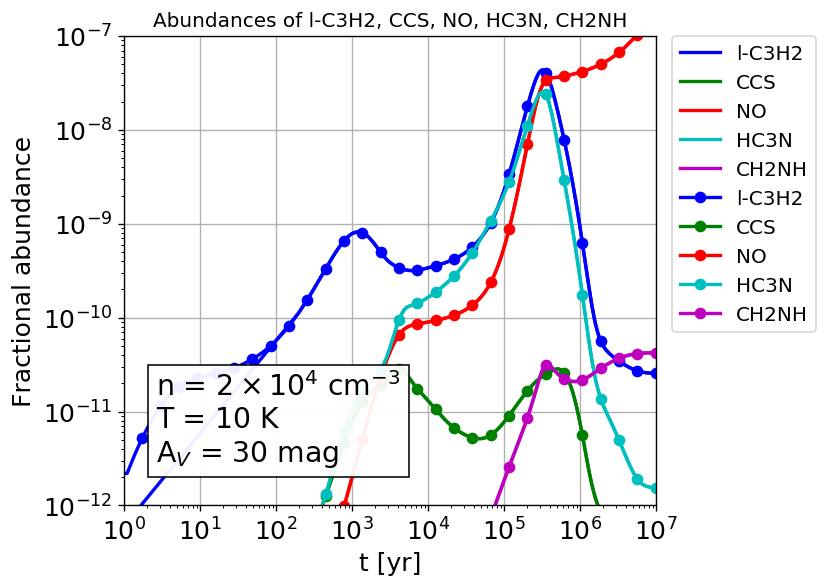

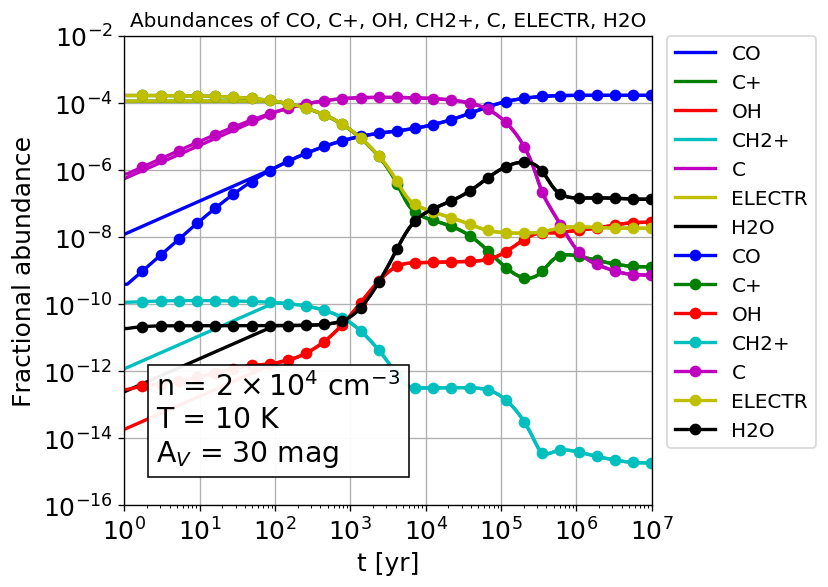

In [5]:
# High density, high Av (TMC1 analogue)
# n = 2e4 cm^{-3}, T=10 K, Av=30mag

#
# Direct comparision to Fig 1. in Wakelam 2015
#

spec   = ["l-C3H2","CCS","NO","HC3N","CH2NH"]
xrange = [1e0,1e7]
yrange = [1e-12,1e-7]

# Wakelam et al. 2015
w15.PlotAbuns(spec, xrange=xrange, yrange=yrange)
# MPChem
tmc1.PlotAbuns(spec, xlog=1, xrange=xrange, yrange=yrange, 
               oplot=True, marker='o', markevery=6, extlegend=
               "n = $2 \\times 10^4$ cm$^{-3}$\nT = 10 K\nA$_V$ = 30 mag")

#
# More abundant species
#

spec = ["CO","C+",'OH','CH2+',"C","ELECTR","H2O"]
xrange = [1e0,1e7]
yrange = [1e-16,1e-2]

# Wakelam et al. 2015
w15.PlotAbuns(spec, xrange=xrange, yrange=yrange)
# MPChem
tmc1.PlotAbuns(spec, xlog=1, xrange=xrange, yrange=yrange,
               oplot=True, marker='o', markevery=6, extlegend=
               "n = $2 \\times 10^4$ cm$^{-3}$\nT = 10 K\nA$_V$ = 30 mag")

## High density and low A<sub>V</sub> (PDR-like model)

Solid lines show the Nahoon/Nautilus (Wakelam et al. 2015) model. Solid line with circles represent the alchemic models with the KIDA network.

Model parameters:

 * n<sub>H</sub> = $2 \times 10^{4}$ cm<sup>-3</sup>

 * T<sub>gas</sub> = T<sub>dust</sub> = 20 K

 * A<sub>V</sub> = 1 mag

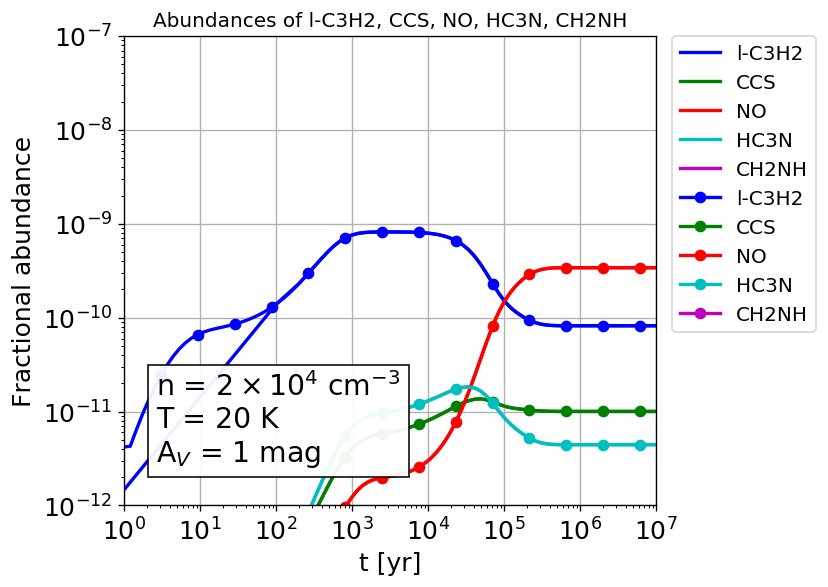

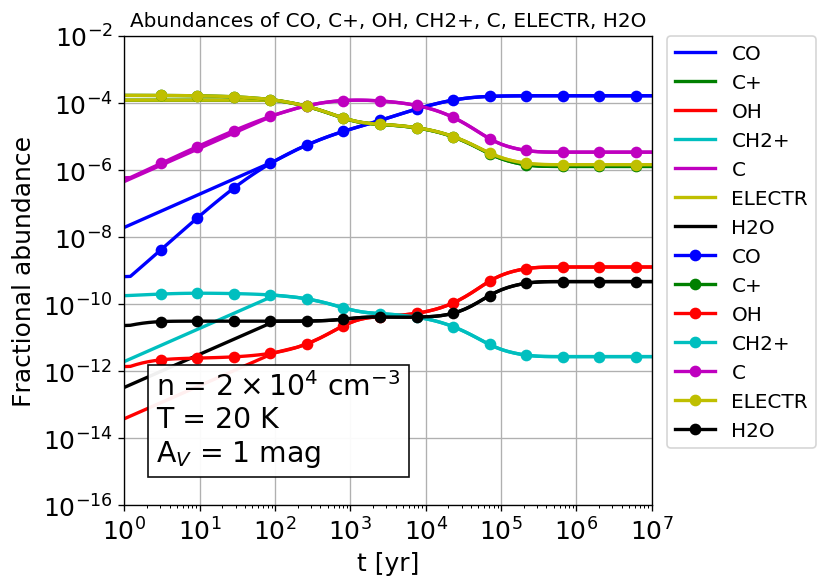

In [6]:
# High density low Av
# n = 2e4 cm^{-3}, T=20 K, Av=1mag

# Direct comparision to Fig 1. in Wakelam 2015
spec   = ["l-C3H2","CCS","NO","HC3N","CH2NH"]
xrange = [1e0,1e7]
yrange = [1e-12,1e-7]

# Nautilus results
pdr1av.PlotAbuns(spec, yrange=yrange, xrange=xrange)
# MPChem results
pdrk1av.PlotAbuns(spec, xlog=1, xrange=xrange, yrange=yrange,
                  oplot=True, marker='o', markevery=6, extlegend=
                  "n = $2 \\times 10^4$ cm$^{-3}$\nT = 20 K\nA$_V$ = 1 mag")

# More abundant species
spec   = ["CO","C+",'OH','CH2+',"C","ELECTR","H2O"]
xrange = [1e0,1e7]
yrange = [1e-16,1e-2]

# Wakelam et al. 2015
pdr1av.PlotAbuns(spec, xrange=xrange, yrange=yrange)
# ALCHEMIC reproduction
pdrk1av.PlotAbuns(spec, xlog=1, xrange=xrange, yrange=yrange,
                  oplot=True, marker='o', markevery=6, extlegend=
                  "n = $2 \\times 10^4$ cm$^{-3}$\nT = 20 K\nA$_V$ = 1 mag")

## c) Low density and low A<sub>V</sub> (PDR-like model)

Solid lines show the Nahoon (Wakelam et al. 2015) model. Solid line with circles represent the MPChem models with the KIDA network.

Model parameters:

 * n<sub>H</sub> = $2 \times 10^{2}$ cm<sup>-3</sup>

 * T<sub>gas</sub> = T<sub>dust</sub> = 20 K

 * A<sub>V</sub> = 1 mag

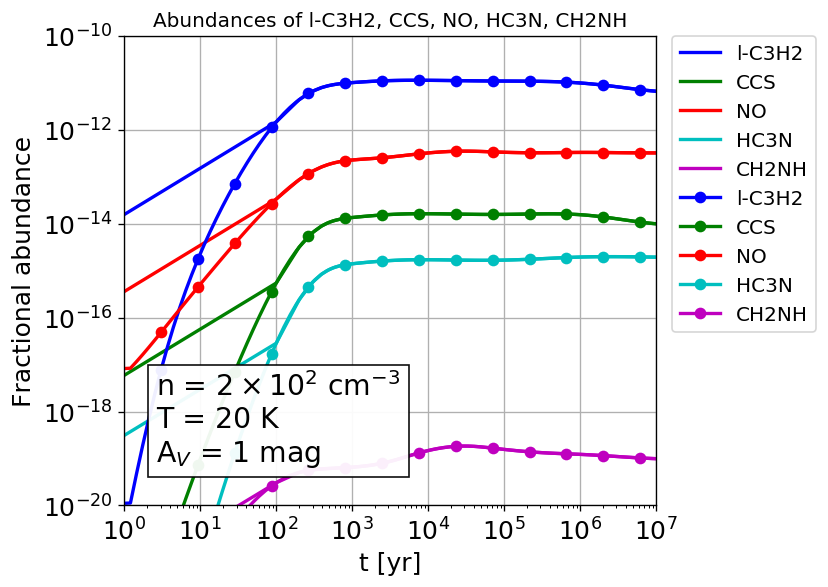

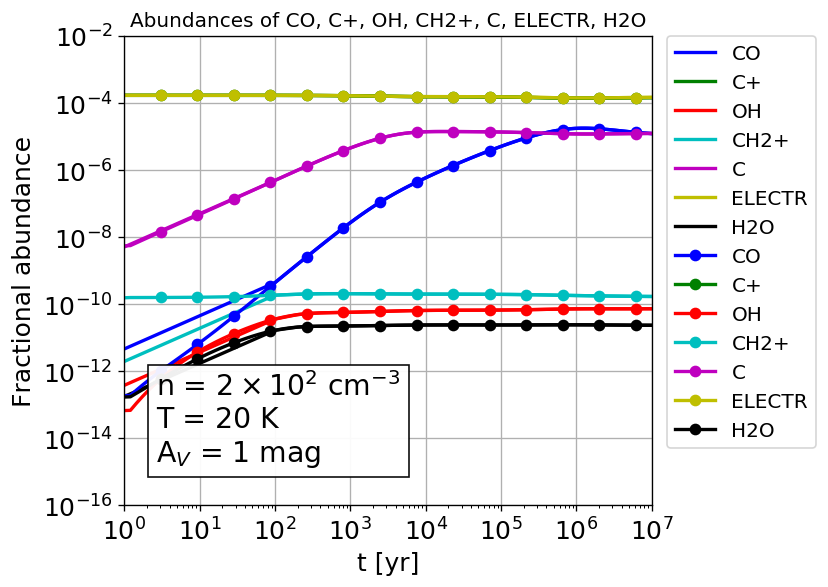

In [7]:
# High density low Av
# n = 2e2 cm^{-3}, T=20 K, Av=1mag

# Direct comparision to Fig 1. in Wakelam 2015
spec   = ["l-C3H2","CCS","NO","HC3N","CH2NH"]
xrange = [1e0,1e7]
yrange = [1e-20,1e-10]

# Nautilus result
pdr1avn200.PlotAbuns(spec, xrange=xrange, yrange=yrange)
# MPChem result
pdrk1avn200.PlotAbuns(spec, xlog=1, xrange=xrange, yrange=yrange,
                      oplot=True, marker='o', markevery=6, extlegend=
                      "n = $2 \\times 10^2$ cm$^{-3}$\nT = 20 K\nA$_V$ = 1 mag")

# Species also found in the NL99 network
spec = ["CO","C+",'OH','CH2+',"C","ELECTR","H2O"]
xrange = [1e0,1e7]
yrange = [1e-16,1e-2]

# Nautilus result
pdr1avn200.PlotAbuns(spec, xrange=xrange, yrange=yrange)
# MPChem result
pdrk1avn200.PlotAbuns(spec, xlog=1, xrange=xrange, yrange=yrange,
                      oplot=True, marker='o', markevery=6, extlegend=
                      "n = $2 \\times 10^2$ cm$^{-3}$\nT = 20 K\nA$_V$ = 1 mag")

## How is species x produced?

The PlotRate() method shows the most prominent production and destruction mechanisms of a selected species as a function of time.

In [ ]:
# Plot the rates for selected species:
tmc1.PlotRates(species="CCS",xrange=[1e1,1e8],markevery=4)

## Reaction rate coefficient matching

The reaction rate coefficients between two MPChem models can be easily compared (i.e. overplotted on top of each other).

The blue circles represent the TMC1 model with the KIDA network, while the red triangles show a similar model with lower visual extinction.

In [ ]:
# Compare the reaction rate coefficients between two models:

a=tmc1.PlotRateCoefs(topn=10,r2crit="NO")                       # This is the TMC1 model (Av=20 mag)
b=pdrk1av.PlotRateCoefs(ReactList=a,oplot=True,marker="^")      # Similar model with Av=1 mag